In [35]:
try:
    import citipy
except:
    import pip
    pip.main(['install','citipy'])
    import citipy
    
try:
    import gmaps
    import gmaps.datasets
except:
    import pip
    pip.main(['install','gmaps'])
    import gmaps
    import gmaps.datasets

In [36]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [37]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform( low = -90.000, high = 90.000, size = 1500)

lngs = np.random.uniform( low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

# zip() will pack each pair having the same index in their respective array into a tuple
# A zip can be unzipped once

In [38]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs) 

# this will unzip into a list

In [39]:
# use the print() to display the latitude and longitude combinations.

#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [40]:
from citipy import citipy

In [41]:
# Create a list to hold the cities

cities = []

# Use for loop to identify nearest city for each lat and longatude combo

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we add it to cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm total (1500) 

len(cities)

635

In [42]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

# import requests module

import requests

#import API key

from config import weather_api_key

In [43]:
# Starting URL for Weather Map API Call

url = 'http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=' + weather_api_key


In [44]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval        ")
print('--------------------------------')


# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list



#loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
        
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    
    # Log the url, record, and set numbers and the city.
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('$Y-$m-%d %H:%M:%S')
        
        # Append the city info into city_data list.
        
        city_data.append({'City': city.title(),
                        'Lat': city_lat,
                        'Lng': city_lng,
                        'Max Temp': city_max_temp,
                        'Humidity': city_humidity,
                        'Cloudiness': city_clouds,
                        'Wind Speed': city_wind,
                        'Country': city_country,
                        'Date': city_date})
# If an error is experienced, skip the city.
    except:
        
        print('City not found. Skipping...')
        
        pass

# Indicate that Data loading is complete

print('----------------------------------')
print('Date Retrival Complete            ')
print('----------------------------------')

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | windsor
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | cabedelo
Processing Record 7 of Set 1 | toliary
City not found. Skipping...
Processing Record 8 of Set 1 | atasu
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | coalinga
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | mantua
Processing Record 17 of Set 1 | moengo
Processing Record 18 of Set 1 | ust-kulom
Processing Record 19 of Set 1 | briancon
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 | ushuaia
Pr

Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | bandar-e lengeh
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | anapskaya
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | mapiripan
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | hobbs
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | iturbe
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | belen
Processing Record 3 of Set 5 | maua
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | nsoko
Processing Record 7 of Set 5 | lewistown
Processing Record 8 of Set 5 | mazulskiy
City not found. Skipping...
Processing Record 9 of Set 5 | ushtobe
Processing Record 10 of Set 5 | warqla
City not found. S

Processing Record 25 of Set 8 | airai
Processing Record 26 of Set 8 | ulaanbaatar
Processing Record 27 of Set 8 | pocone
Processing Record 28 of Set 8 | araouane
Processing Record 29 of Set 8 | mirnyy
Processing Record 30 of Set 8 | yar-sale
Processing Record 31 of Set 8 | nizhniy kuranakh
Processing Record 32 of Set 8 | havoysund
Processing Record 33 of Set 8 | ilheus
Processing Record 34 of Set 8 | bekovo
Processing Record 35 of Set 8 | janesville
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | murgab
Processing Record 38 of Set 8 | chambas
Processing Record 39 of Set 8 | kimbe
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | zamboanga
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | nishihara
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | muscat
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | ndele
Processing Record 48 of Set 8 | sorsk
Processing Record 49 of Se

Processing Record 14 of Set 12 | mount isa
Processing Record 15 of Set 12 | japura
Processing Record 16 of Set 12 | rocha
Processing Record 17 of Set 12 | bernay
Processing Record 18 of Set 12 | narragansett
Processing Record 19 of Set 12 | kumluca
Processing Record 20 of Set 12 | alta gracia
Processing Record 21 of Set 12 | masvingo
Processing Record 22 of Set 12 | le vauclin
Processing Record 23 of Set 12 | micheweni
Processing Record 24 of Set 12 | skibbereen
Processing Record 25 of Set 12 | kismayo
Processing Record 26 of Set 12 | fare
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | rawson
Processing Record 30 of Set 12 | turkan
Processing Record 31 of Set 12 | nola
Processing Record 32 of Set 12 | fukue
Processing Record 33 of Set 12 | golynki
Processing Record 34 of Set 12 | peleduy
Processing Record 35 of Set 12 | sikonge
Processing Record 36 of Set 12 | borovichi
Processing Record 37 of Set 12 | otofuke
Processing Re

In [45]:
len(city_data)

585

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,3.22,74,39,2.43,NZ,$Y-$m-16 22:24:51
1,Khatanga,71.9667,102.5000,17.76,42,100,8.83,RU,$Y-$m-16 22:24:51
2,Yellowknife,62.4560,-114.3525,14.29,67,75,4.12,CA,$Y-$m-16 22:21:26
3,Windsor,42.3001,-83.0165,34.19,31,0,7.72,CA,$Y-$m-16 22:20:00
4,Coihaique,-45.5752,-72.0662,3.97,60,20,1.54,CL,$Y-$m-16 22:24:52
5,Cabedelo,-6.9811,-34.8339,25.37,76,10,4.02,BR,$Y-$m-16 22:24:53
6,Atasu,48.6814,71.6433,15.08,56,18,1.93,KZ,$Y-$m-16 22:24:53
7,Punta Arenas,-53.1500,-70.9167,1.06,69,20,5.14,CL,$Y-$m-16 22:24:54
8,Souillac,-20.5167,57.5167,22.21,83,40,2.06,MU,$Y-$m-16 22:24:54
9,Puerto Ayora,-0.7393,-90.3518,25.98,96,75,4.02,EC,$Y-$m-16 22:24:55


In [47]:
new_coulumn_order = ['City','Country','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Current Description']

city_data_df = city_data_df[new_coulumn_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,$Y-$m-16 22:24:51,-46.6000,168.3333,3.22,74,39,2.43
1,Khatanga,RU,$Y-$m-16 22:24:51,71.9667,102.5000,17.76,42,100,8.83
2,Yellowknife,CA,$Y-$m-16 22:21:26,62.4560,-114.3525,14.29,67,75,4.12
3,Windsor,CA,$Y-$m-16 22:20:00,42.3001,-83.0165,34.19,31,0,7.72
4,Coihaique,CL,$Y-$m-16 22:24:52,-45.5752,-72.0662,3.97,60,20,1.54
5,Cabedelo,BR,$Y-$m-16 22:24:53,-6.9811,-34.8339,25.37,76,10,4.02
6,Atasu,KZ,$Y-$m-16 22:24:53,48.6814,71.6433,15.08,56,18,1.93
7,Punta Arenas,CL,$Y-$m-16 22:24:54,-53.1500,-70.9167,1.06,69,20,5.14
8,Souillac,MU,$Y-$m-16 22:24:54,-20.5167,57.5167,22.21,83,40,2.06
9,Puerto Ayora,EC,$Y-$m-16 22:24:55,-0.7393,-90.3518,25.98,96,75,4.02


In [48]:
# Create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [49]:
# Create variable for relevant fields to be used in plots

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed =city_data_df['Wind Speed']


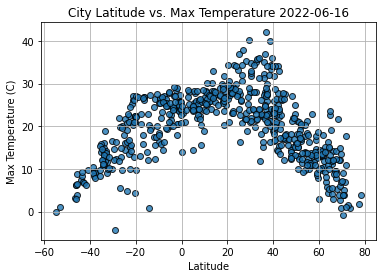

In [50]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig1.png')

# Show plot.

plt.show()

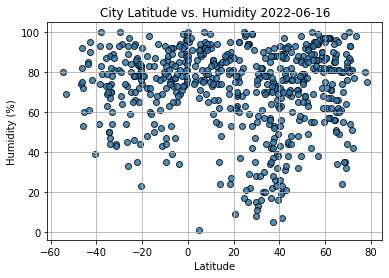

In [51]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig2.png')

# Show plot.

plt.show()

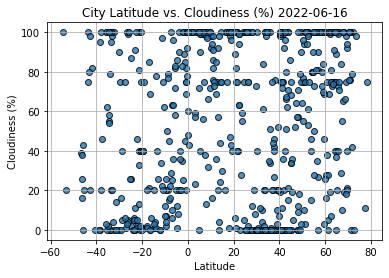

In [52]:
# Build the scatter plot for latitude vs. Cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig3.png')

# Show plot.

plt.show()

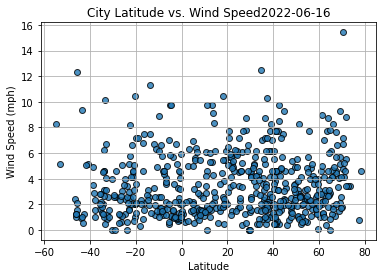

In [53]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           wind_speed,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig4.png')

# Show plot.

plt.show()

In [54]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)) + '    r-value = ' + str(round(r_value,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
# Create Northern and Southern Hemisphere df

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

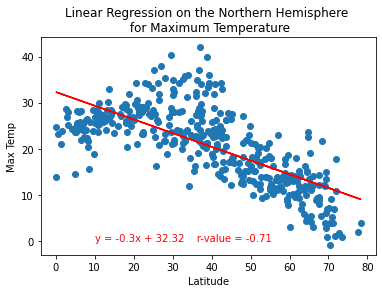

In [56]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                      'Max Temp', (10,0))

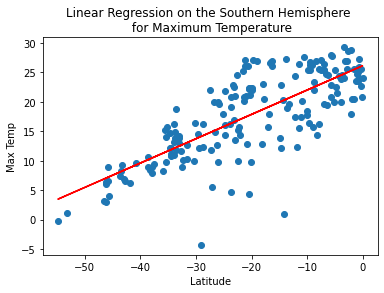

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,33))

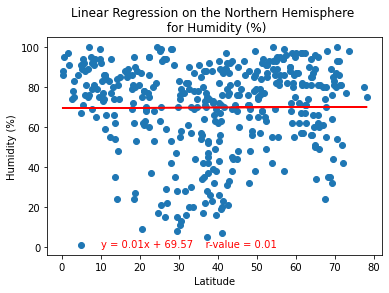

In [58]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Humidity (%)', 
                      'Humidity (%)', (10,0))

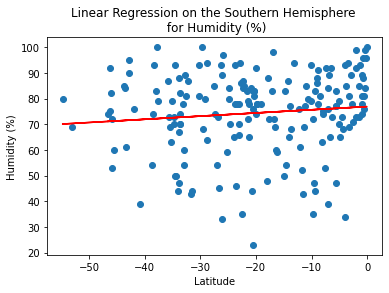

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity (%)', 
                       'Humidity (%)',(-50,5))

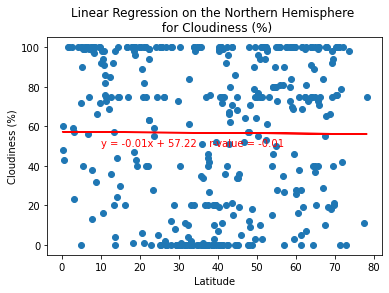

In [60]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Cloudiness (%)', 
                      'Cloudiness (%)', (10,50))

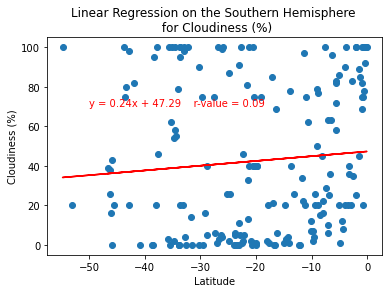

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness (%)', 
                       'Cloudiness (%)',(-50,70))

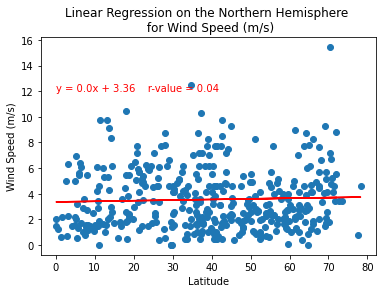

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(0,12))

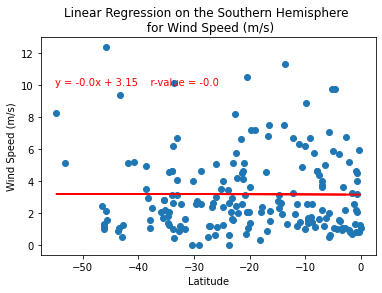

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(-55,10))